In [14]:
import pandas as pd

# Load the dataset
file_path = "/Users/albertozanelli/Desktop/astrostatistics_bicocca_2025/solutions/galaxyquasar.csv"
data = pd.read_csv(file_path)

u_g = data['u'] - data['g']
g_r = data['g'] - data['r']
r_i = data['r'] - data['i']
i_z = data['i'] - data['z']

classes = data['class'].apply(lambda x: 0 if x == 'GALAXY' else 1)

features = pd.DataFrame({
    'u-g': u_g,
    'g-r': g_r,
    'r-i': r_i,
    'i-z': i_z,
    'classes': classes
})

# Rescale the features to the range [0, 1]
features[['u-g', 'g-r', 'r-i', 'i-z']] = features[['u-g', 'g-r', 'r-i', 'i-z']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Display the first few rows of the rescaled features
print(features.head())

        u-g       g-r       r-i       i-z  classes
0  0.401549  0.720105  0.558512  0.506818        1
1  0.577821  0.792401  0.567054  0.519515        0
2  0.572962  0.777776  0.562738  0.512541        0
3  0.493745  0.777789  0.567779  0.516769        0
4  0.367332  0.738696  0.552354  0.517480        1


In [15]:
from sklearn.model_selection import train_test_split

# Dividi il dataset in training e validazione
train_features, val_features, train_classes, val_classes = train_test_split(
    features.drop(columns=['classes']),  # Caratteristiche
    features['classes'],                # Target
    test_size=0.2,                      # Percentuale per il set di validazione
    random_state=42                     # Per riproducibilità
)

# Mostra le dimensioni dei set
print(f"Training set size: {train_features.shape[0]}")
print(f"Validation set size: {val_features.shape[0]}")

Training set size: 40000
Validation set size: 10000


Accuracy: 0.97


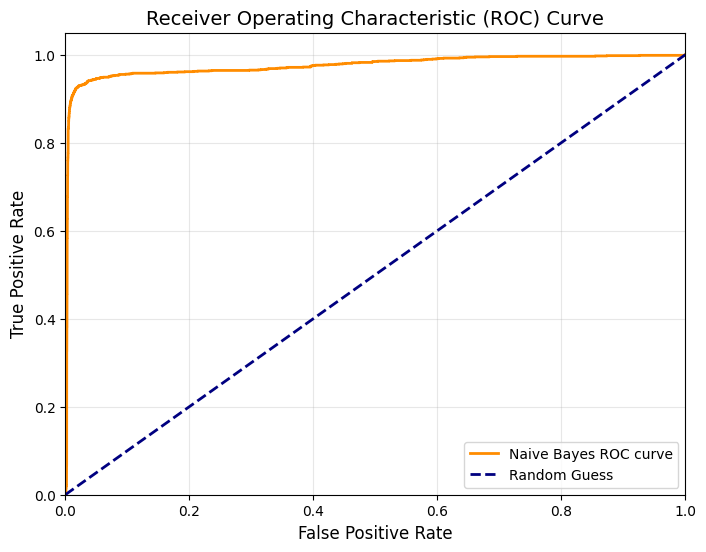

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Inizializza il modello Gaussian Naive Bayes
gnb = GaussianNB()

# Addestra il modello sui dati di training
gnb.fit(train_features, train_classes)

# Effettua previsioni sui dati di validazione
val_predictions = gnb.predict(val_features)

# Calcola l'accuratezza
accuracy = accuracy_score(val_classes, val_predictions)
print(f"Accuracy: {accuracy:.2f}")


# Calcola la ROC curve
fpr_NB, tpr_NB, _ = roc_curve(val_classes, gnb.predict_proba(val_features)[:, 1])


# Plot della ROC curve con uno stile più carino
plt.figure(figsize=(8, 6))
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=2, label='Naive Bayes ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

Accuracy (LDA): 0.98


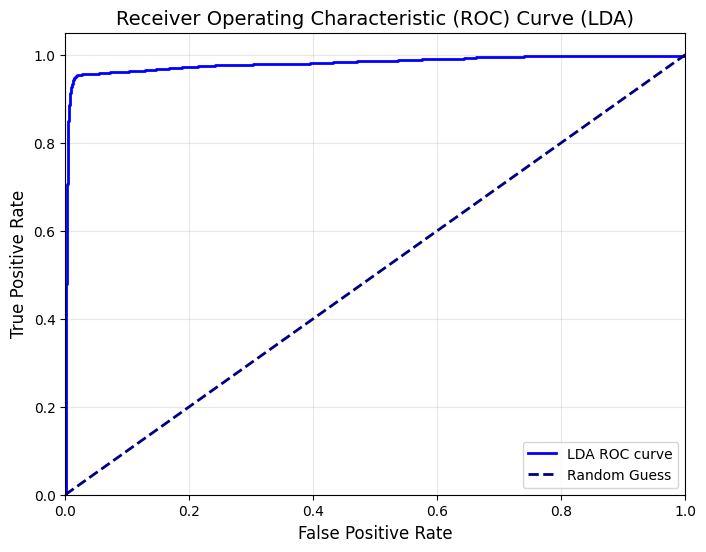

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Inizializza il modello LDA
lda = LinearDiscriminantAnalysis()

# Addestra il modello sui dati di training
lda.fit(train_features, train_classes)

# Effettua previsioni sui dati di validazione
val_predictions_lda = lda.predict(val_features)

# Calcola l'accuratezza
accuracy_lda = accuracy_score(val_classes, val_predictions_lda)
print(f"Accuracy (LDA): {accuracy_lda:.2f}")

# Calcola la ROC curve
fpr_LDA, tpr_LDA, _ = roc_curve(val_classes, lda.predict_proba(val_features)[:, 1])

# Plot della ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_LDA, tpr_LDA, color='blue', lw=2, label='LDA ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve (LDA)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

Accuracy (QDA with regularization): 0.86


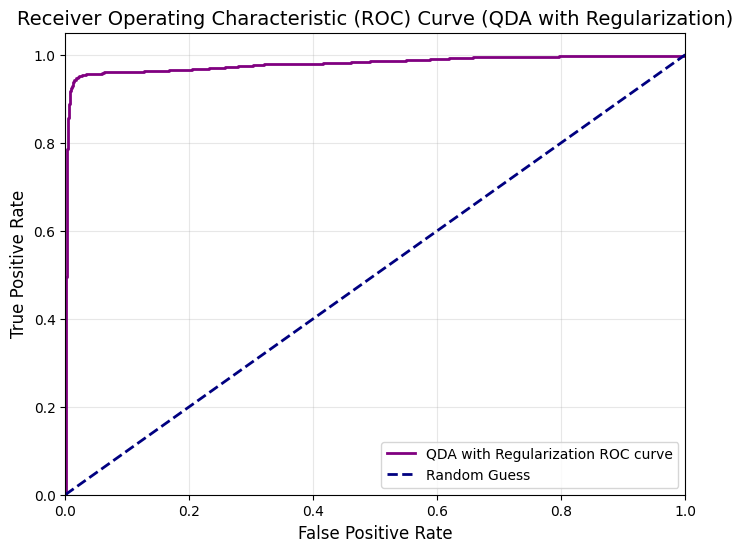

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Adjust the regularization parameter to address the warning
qda_with_reg = QuadraticDiscriminantAnalysis(reg_param=0.1)

# Refit the model with the adjusted parameter
qda_with_reg.fit(train_features, train_classes)

# Make predictions with the refitted model
val_predictions_QDA_reg = qda_with_reg.predict(val_features)

# Calculate the accuracy
accuracy_QDA_reg = accuracy_score(val_classes, val_predictions_QDA_reg)
print(f"Accuracy (QDA with regularization): {accuracy_QDA_reg:.2f}")

# Calculate the ROC curve
fpr_QDA_reg, tpr_QDA_reg, _ = roc_curve(val_classes, qda_with_reg.predict_proba(val_features)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_QDA_reg, tpr_QDA_reg, color='purple', lw=2, label='QDA with Regularization ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve (QDA with Regularization)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

Best k: 13


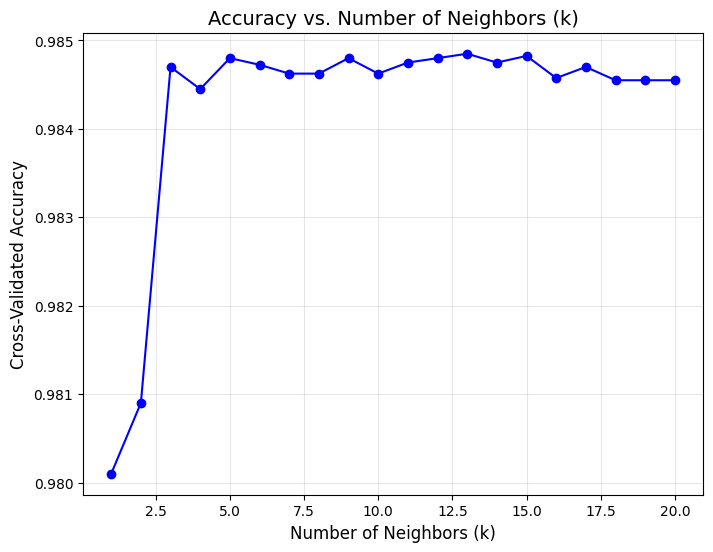

Accuracy (KNN): 0.98


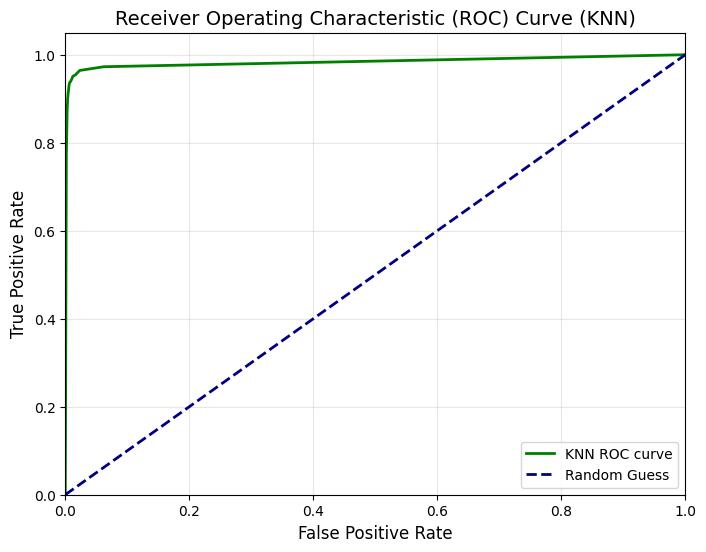

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Inizializza il modello KNN con un numero di vicini (k) specificato
knn = KNeighborsClassifier(n_neighbors=5)
# Esegui la cross-validation per diversi valori di k

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_features, train_classes, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Trova il valore di k con la migliore accuratezza
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validated Accuracy', fontsize=12)
plt.title('Accuracy vs. Number of Neighbors (k)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


knn = KNeighborsClassifier(n_neighbors=best_k)

# Addestra il modello sui dati di training
knn.fit(train_features, train_classes)

# Effettua previsioni sui dati di validazione
val_predictions_knn = knn.predict(val_features)

# Calcola l'accuratezza
accuracy_knn = accuracy_score(val_classes, val_predictions_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

# Calcola la ROC curve
fpr_KNN, tpr_KNN, _ = roc_curve(val_classes, knn.predict_proba(val_features)[:, 1])

# Plot della ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_KNN, tpr_KNN, color='green', lw=2, label='KNN ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve (KNN)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

Accuracy (GMM Bayes): 0.98


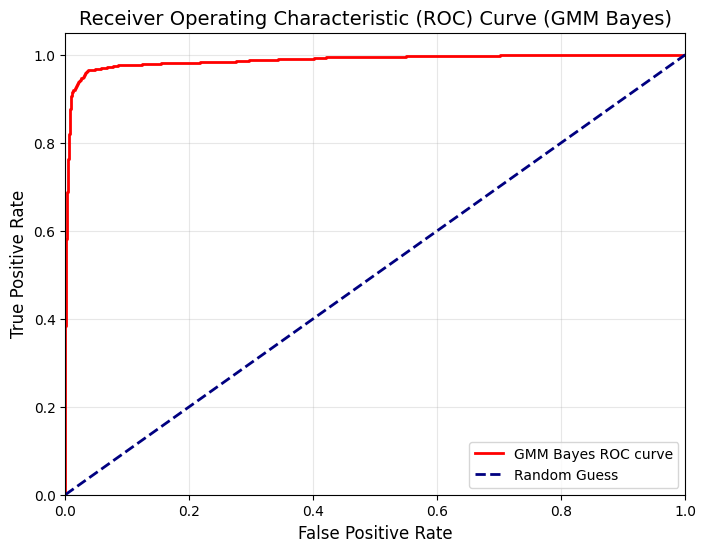

In [29]:
from astroML.classification import GMMBayes

# Inizializza il modello GMM Bayes
gmm_bayes = GMMBayes(n_components=2, covariance_type='full')

# Addestra il modello sui dati di training
gmm_bayes.fit(train_features, train_classes)

# Effettua previsioni sui dati di validazione
val_predictions_gmm = gmm_bayes.predict(val_features)

# Calcola l'accuratezza
accuracy_gmm = accuracy_score(val_classes, val_predictions_gmm)
print(f"Accuracy (GMM Bayes): {accuracy_gmm:.2f}")

# Calcola la ROC curve
fpr_GMM, tpr_GMM, _ = roc_curve(val_classes, gmm_bayes.predict_proba(val_features)[:, 1])

# Plot della ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_GMM, tpr_GMM, color='red', lw=2, label='GMM Bayes ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve (GMM Bayes)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

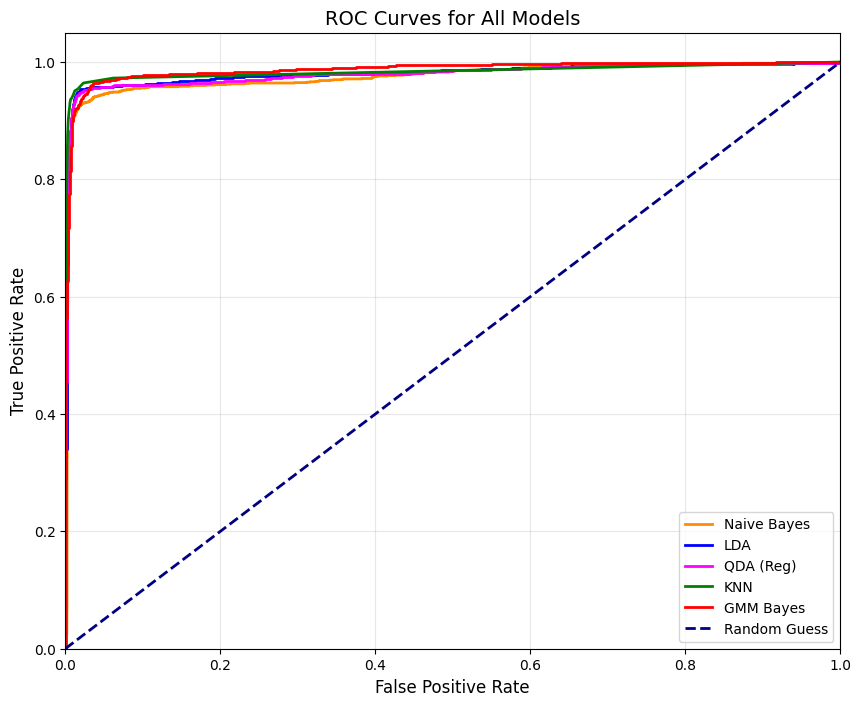

The best model is KNN with an accuracy of 0.9850


In [33]:
# Plot di tutte le ROC curve in un'unica immagine
plt.figure(figsize=(10, 8))

# ROC curve per ogni modello
plt.plot(fpr_NB, tpr_NB, label='Naive Bayes', color='darkorange', lw=2)
plt.plot(fpr_LDA, tpr_LDA, label='LDA', color='blue', lw=2)
plt.plot(fpr_QDA_reg, tpr_QDA_reg, label='QDA (Reg)', color='magenta', lw=2)
plt.plot(fpr_KNN, tpr_KNN, label='KNN', color='green', lw=2)
plt.plot(fpr_GMM, tpr_GMM, label='GMM Bayes', color='red', lw=2)

# Linea di riferimento per il caso casuale
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Configurazione del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

# Mostra il grafico
plt.show()

# Confronta le accuratezze dei modelli
accuracies = {
    "Naive Bayes": accuracy,
    "LDA": accuracy_lda,
    "QDA (Reg)": accuracy_QDA_reg,
    "KNN": accuracy_knn,
    "GMM Bayes": accuracy_gmm
}

# Trova il modello con la migliore accuratezza
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")